# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 609
['paradip garh', 'atafu village', 'pitimbu', 'west island', 'puerto boyaca', 'longyearbyen', 'ad dabbah', 'port elizabeth', 'saint-francois', 'aykhal', 'labuan', 'albany', 'masterton', 'adamstown', 'alice springs', 'utrik', 'glogovac', 'ribeira grande', 'sonsorol village', 'ancud', 'kristiansund', 'puerto natales', 'san patricio', 'hawaiian paradise park', 'anadyr', 'tiksi', 'port-aux-francais', 'tacna', 'waitangi', 'geraldton', 'el daein', 'blackmans bay', 'whitehorse', 'seven pagodas', 'edinburgh of the seven seas', 'kodiak', 'yorkton', 'bethel', 'maceio', 'bahar', 'kingston', 'collingwood', 'hermanus', 'taiohae', 'stanley', 'bredasdorp', 'upington', 'sinop', 'turpan', 'port mathurin', 'nagqu', 'rodolfo sanchez taboada', 'camana', 'hamilton', 'lagoa', 'thompson', 'pawni', 'freising', 'weyburn', 'lastoursville', 'tazovsky', 'happy valley-goose bay', 'olonkinbyen', 'santiago de cuba', 'new norfolk', 'castillos', "nar'yan-mar", 'chicxulub puerto', "al '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paradip garh
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | pitimbu
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | puerto boyaca
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | ad dabbah
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | saint-francois
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | labuan
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | masterton
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | alice springs
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | glogovac
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | kristiansund
Processing Rec

Processing Record 38 of Set 4 | veinticinco de mayo
Processing Record 39 of Set 4 | bangar
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | papatowai
Processing Record 42 of Set 4 | nova sintra
Processing Record 43 of Set 4 | tonekabon
Processing Record 44 of Set 4 | setubal
Processing Record 45 of Set 4 | poronaysk
Processing Record 46 of Set 4 | saipan
Processing Record 47 of Set 4 | kayenta
Processing Record 48 of Set 4 | jumla
Processing Record 49 of Set 4 | enewetak
Processing Record 0 of Set 5 | queenstown
Processing Record 1 of Set 5 | puerto ayora
Processing Record 2 of Set 5 | zanjan
Processing Record 3 of Set 5 | mermoz boabab
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | qaqortoq
Processing Record 8 of Set 5 | san bernardo del viento
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | mwinilunga
Processing Record 11 of Set 5 | ans

City not found. Skipping...
Processing Record 33 of Set 8 | auki
Processing Record 34 of Set 8 | chiredzi
Processing Record 35 of Set 8 | colonia
Processing Record 36 of Set 8 | greymouth
Processing Record 37 of Set 8 | gokak
Processing Record 38 of Set 8 | tromso
Processing Record 39 of Set 8 | washington
Processing Record 40 of Set 8 | chontalpa
Processing Record 41 of Set 8 | gazojak
Processing Record 42 of Set 8 | kerikeri
Processing Record 43 of Set 8 | arkalyk
Processing Record 44 of Set 8 | prineville
Processing Record 45 of Set 8 | sangmelima
Processing Record 46 of Set 8 | pinehurst
Processing Record 47 of Set 8 | howard springs
Processing Record 48 of Set 8 | saint-paul
Processing Record 49 of Set 8 | west ilsley
Processing Record 0 of Set 9 | coxen hole
Processing Record 1 of Set 9 | as sulayyil
Processing Record 2 of Set 9 | zelenoborskiy
Processing Record 3 of Set 9 | nantucket
Processing Record 4 of Set 9 | acajutla
Processing Record 5 of Set 9 | baiao
Processing Record 6

Processing Record 24 of Set 12 | itaituba
Processing Record 25 of Set 12 | tofol
Processing Record 26 of Set 12 | tomatlan
Processing Record 27 of Set 12 | zabol
Processing Record 28 of Set 12 | mumford
Processing Record 29 of Set 12 | suva
Processing Record 30 of Set 12 | matveyev kurgan
Processing Record 31 of Set 12 | fomboni
Processing Record 32 of Set 12 | brisas de zicatela
Processing Record 33 of Set 12 | salalah
Processing Record 34 of Set 12 | barguzin
Processing Record 35 of Set 12 | laguna
Processing Record 36 of Set 12 | fossombrone
Processing Record 37 of Set 12 | taulaga
Processing Record 38 of Set 12 | ocean city
Processing Record 39 of Set 12 | okhotsk
Processing Record 40 of Set 12 | callao
Processing Record 41 of Set 12 | santa elena de uairen
Processing Record 42 of Set 12 | timbuktu
Processing Record 43 of Set 12 | jining
Processing Record 44 of Set 12 | devonport
Processing Record 45 of Set 12 | kolonia
Processing Record 46 of Set 12 | labuan lombok
City not found.

In [4]:
 # Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paradip garh,20.3167,86.6167,28.98,83,86,5.94,IN,1690386913
1,atafu village,-8.5421,-172.5159,27.98,77,90,8.86,TK,1690386783
2,pitimbu,-7.4706,-34.8086,29.33,71,17,6.43,BR,1690386919
3,west island,-12.1568,96.8225,23.99,88,75,8.75,CC,1690386919
4,puerto boyaca,5.9758,-74.5885,31.81,57,31,1.37,CO,1690386919


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paradip garh,20.3167,86.6167,28.98,83,86,5.94,IN,1690386913
1,atafu village,-8.5421,-172.5159,27.98,77,90,8.86,TK,1690386783
2,pitimbu,-7.4706,-34.8086,29.33,71,17,6.43,BR,1690386919
3,west island,-12.1568,96.8225,23.99,88,75,8.75,CC,1690386919
4,puerto boyaca,5.9758,-74.5885,31.81,57,31,1.37,CO,1690386919


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

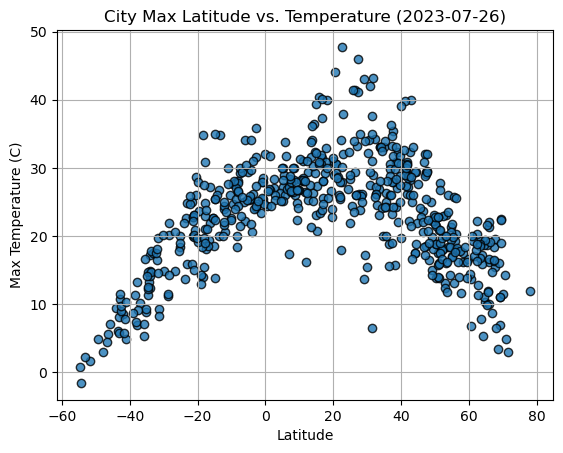

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

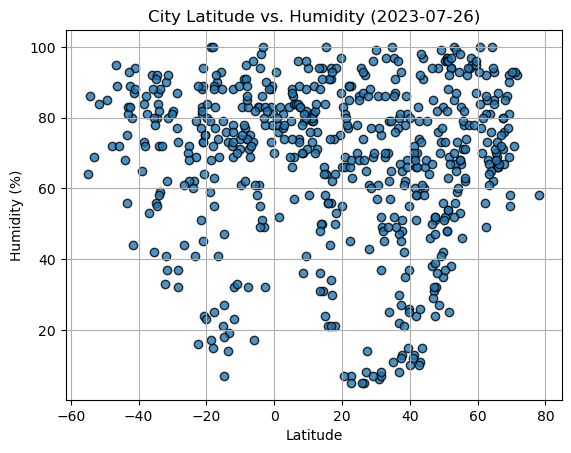

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

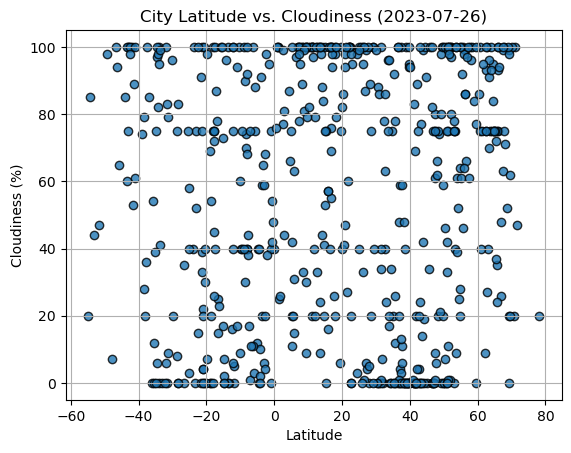

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

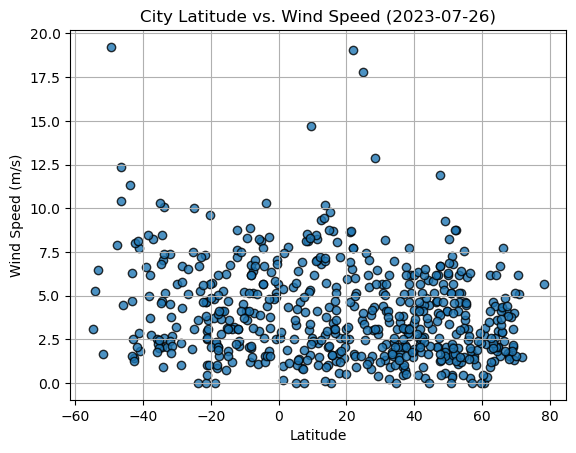

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paradip garh,20.3167,86.6167,28.98,83,86,5.94,IN,1690386913
4,puerto boyaca,5.9758,-74.5885,31.81,57,31,1.37,CO,1690386919
5,longyearbyen,78.2186,15.6401,11.91,58,20,5.66,SJ,1690386920
6,ad dabbah,18.0500,30.9500,40.03,21,98,7.22,SD,1690386920
8,saint-francois,46.4154,3.9054,23.71,38,0,4.63,FR,1690386920


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,27.98,77,90,8.86,TK,1690386783
2,pitimbu,-7.4706,-34.8086,29.33,71,17,6.43,BR,1690386919
3,west island,-12.1568,96.8225,23.99,88,75,8.75,CC,1690386919
7,port elizabeth,-33.9180,25.5701,17.16,72,0,2.57,ZA,1690386826
12,masterton,-40.9597,175.6575,4.94,94,61,1.84,NZ,1690386921


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.37730306795156626


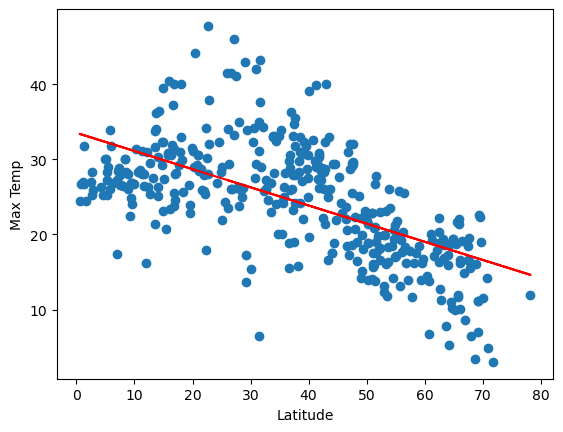

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.7497291924472856


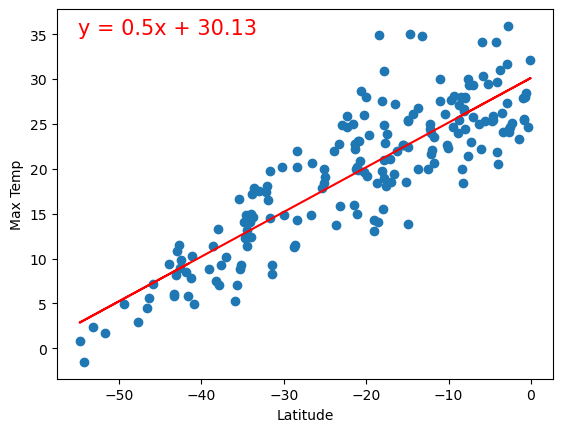

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** For N. Hemisphere the lower r value indicates a negative correlation between the latitude and hte temperature, while for S. Hemisphere a high r value indictaes a strong positive correlation between the latitude and the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0021992625074293277


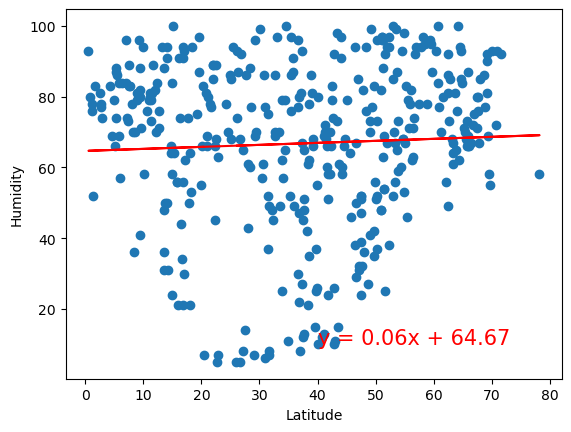

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.005338690153130116


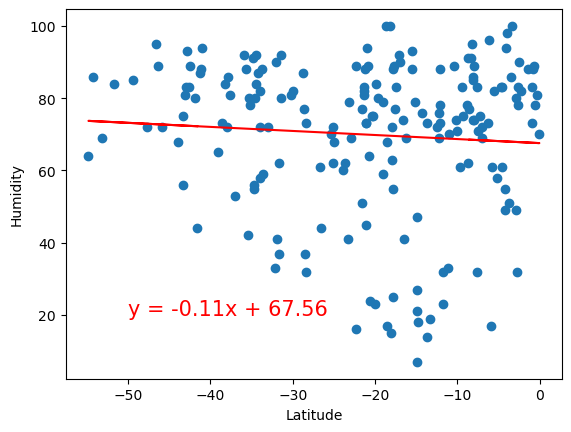

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** The r value is very close to zero that means it shows a very weeak correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003148836332887926


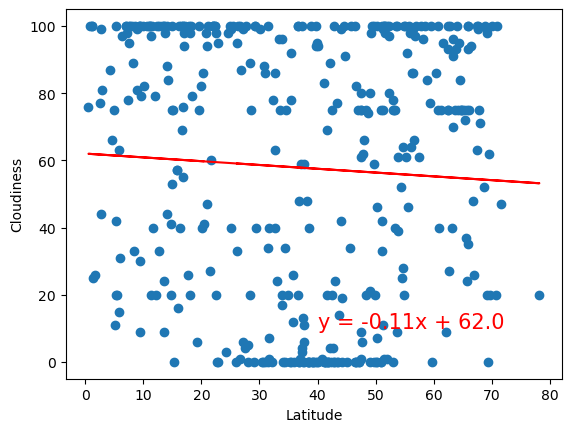

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.030401164646328888


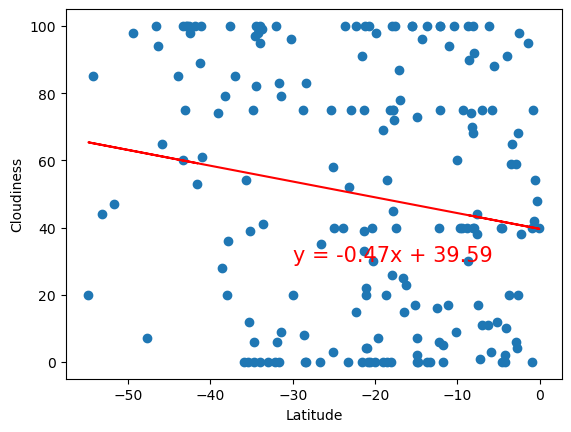

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** The low r values indicate a weak correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024001298073207944


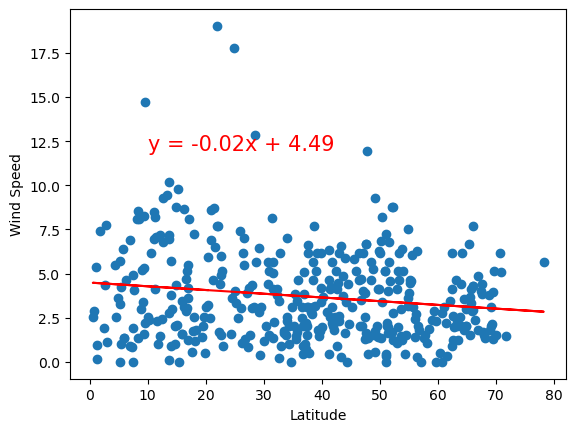

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.014741920713016235


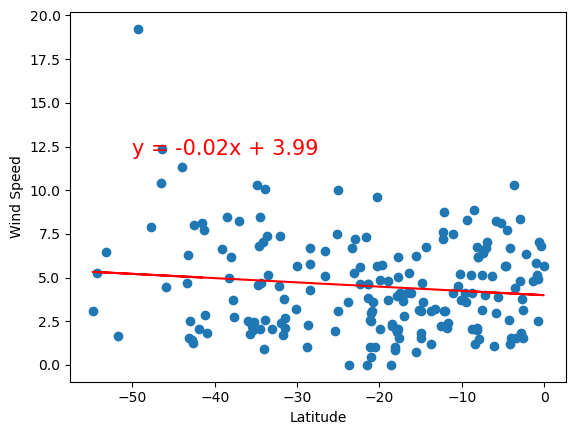

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** The low r values indicate a weak correlation between the wind speed and latitude.